# Analyze marketing campaign using PCA and Kmeans


 Eric Myers



The goal is to cluster customers into groups/clusters. Each cluster represents a group of customers with similar characteristics. The implicit marketing goal is to target each group of customers in a different marketing campaign.

Here are some explanations of the features in this dataset.

```
AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise 
AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise 
AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise 
AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise 
AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise 
Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise 
Complain - 1 if customer complained in the last 2 years
DtCustomer - date of customer’s enrolment with the company
Education - customer’s level of education
Marital - customer’s marital status
Kidhome - number of small children in customer’s household
Teenhome - number of teenagers in customer’s household
Income - customer’s yearly household income
MntFishProducts - amount spent on fish products in the last 2 years
MntMeatProducts - amount spent on meat products in the last 2 years
MntFruits - amount spent on fruits products in the last 2 years
MntSweetProducts - amount spent on sweet products in the last 2 years
MntWines - amount spent on wine products in the last 2 years
MntGoldProds - amount spent on gold products in the last 2 years
NumDealsPurchases - number of purchases made with discount
NumCatalogPurchases - number of purchases made using catalogue
NumStorePurchases - number of purchases made directly in stores
NumWebPurchases - number of purchases made through company’s web site
NumWebVisitsMonth - number of visits to company’s web site in the last month
Recency - number of days since the last purchase
```


---

## Preprocess the data 


Let's remove any missing data using dropna(). We don't want to remove 0 data, because this data might not necessarily be missing

In [57]:
import pandas, seaborn

data = pandas.read_csv('../Datasets/marketing_campaign.csv')

In [49]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [59]:
new_data=data.dropna()
new_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Let's drop the ID attribute, as this is unecessary for analysis

In [62]:
df=new_data.drop(columns=["ID"])

In order to rescale the data, we need to convert categorical variable to numerical. Let's start by converting Dt_Customer to integer format

In [63]:
df['Dt_Customer'] = pandas.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')

In [64]:
df['Dt_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]

In [65]:
print(df.dtypes)

Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContact                   int64
Z_Revenue   

In [66]:
df['Dt_Customer'] = df['Dt_Customer'].astype('int64')

In [67]:
print(df.dtypes)

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer              int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


In [68]:
df['Dt_Customer']

0       1346716800000000000
1       1394236800000000000
2       1377043200000000000
3       1391990400000000000
4       1390089600000000000
               ...         
2235    1371081600000000000
2236    1402358400000000000
2237    1390608000000000000
2238    1390521600000000000
2239    1350259200000000000
Name: Dt_Customer, Length: 2216, dtype: int64

Dt_Customer is now int64 type, so it can be included when processing the data

---

**Getting rid of categorical variables** (10 points)

In [58]:
print(df.dtypes)

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer              int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


According to the above dtypes, Education and Marital_Status are objects, or categorical. In order to rescale the data, we have to convert these attributes to numerical in order to rescale

In [69]:
import pandas
X=pandas.get_dummies(df, columns= ['Education', 'Marital_Status'])

In [70]:
X

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,1346716800000000000,58,635,88,546,172,...,0,0,0,0,0,0,1,0,0,0
1,1954,46344.0,1,1,1394236800000000000,38,11,1,6,2,...,0,0,0,0,0,0,1,0,0,0
2,1965,71613.0,0,0,1377043200000000000,26,426,49,127,111,...,0,0,0,0,0,0,0,1,0,0
3,1984,26646.0,1,0,1391990400000000000,26,11,4,20,10,...,0,0,0,0,0,0,0,1,0,0
4,1981,58293.0,1,0,1390089600000000000,94,173,43,118,46,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,1371081600000000000,46,709,43,182,42,...,0,0,0,0,0,1,0,0,0,0
2236,1946,64014.0,2,1,1402358400000000000,56,406,0,30,0,...,0,1,0,0,0,0,0,1,0,0
2237,1981,56981.0,0,0,1390608000000000000,91,908,48,217,32,...,0,0,0,0,1,0,0,0,0,0
2238,1956,69245.0,0,1,1390521600000000000,8,428,30,214,80,...,1,0,0,0,0,0,0,1,0,0


---

These features don't have the same scale. To use a distance-based clustering method like KMeans, we will need to rescale the features.

Let's use MinMaxScaler to rescale all numerical features.

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_data = pandas.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
new_data

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.621359,0.084832,0.0,0.0,0.051502,0.585859,0.425318,0.442211,0.316522,0.664093,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.592233,0.067095,0.5,0.5,0.838340,0.383838,0.007368,0.005025,0.003478,0.007722,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.699029,0.105097,0.0,0.0,0.553648,0.262626,0.285332,0.246231,0.073623,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.883495,0.037471,0.5,0.0,0.801144,0.262626,0.007368,0.020101,0.011594,0.038610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.854369,0.085065,0.5,0.0,0.769671,0.949495,0.115874,0.216080,0.068406,0.177606,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.718447,0.089472,0.0,0.5,0.454936,0.464646,0.474883,0.216080,0.105507,0.162162,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2236,0.514563,0.093669,1.0,0.5,0.972818,0.565657,0.271936,0.000000,0.017391,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2237,0.854369,0.083092,0.0,0.0,0.778255,0.919192,0.608171,0.241206,0.125797,0.123552,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2238,0.611650,0.101536,0.0,0.5,0.776824,0.080808,0.286671,0.150754,0.124058,0.308880,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


---

We have now processed the data, which is now in a form that is suitable for analysis.

The goal is to identify groups of customers that share similar characteristics.



---

**Using seaborn to separate the data**


The goal is to visually separate the data.



In [73]:
new_data.var().sort_values()

Z_Revenue                  0.000000
Z_CostContact              0.000000
Marital_Status_Absurd      0.000902
Marital_Status_YOLO        0.000902
Marital_Status_Alone       0.001353
Income                     0.001433
Complain                   0.009391
NumWebPurchases            0.010306
NumCatalogPurchases        0.010926
AcceptedCmp2               0.013361
Year_Birth                 0.013541
NumWebVisitsMonth          0.014706
NumDealsPurchases          0.016447
MntMeatProducts            0.016905
Education_Basic            0.023785
MntSweetProducts           0.024575
MntGoldProds               0.026056
Marital_Status_Widow       0.033135
MntFruits                  0.039988
MntFishProducts            0.044689
MntWines                   0.051049
AcceptedCmp1               0.060000
NumStorePurchases          0.062530
AcceptedCmp5               0.067791
AcceptedCmp3               0.068176
AcceptedCmp4               0.068561
Kidhome                    0.072064
Teenhome                   0

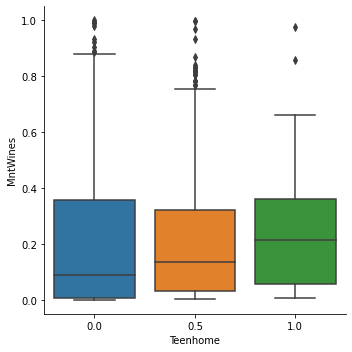

In [98]:
seaborn.catplot(data=new_data, x='Teenhome', y='MntWines', kind='box')

It looks like those with 2 teenagers have a slightly higher average of buying wine than those with 1 or 0 teenagers

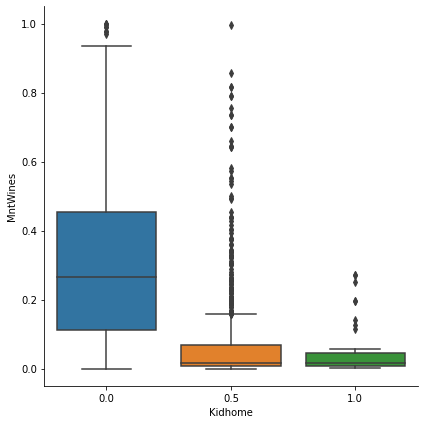

In [103]:
seaborn.catplot(data=new_data, x="Kidhome", y="MntWines", kind='box', height=6)

Whereas those with 0 kids have a lower average of buying wine than those with 1 kid.

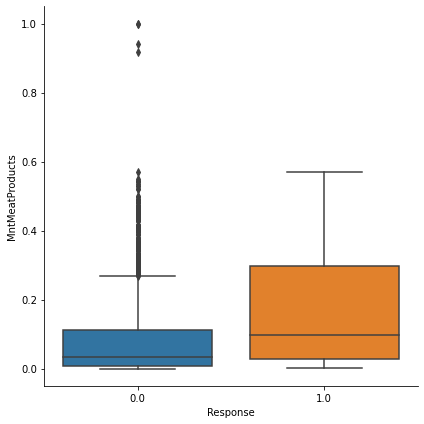

In [102]:
seaborn.catplot(data=new_data, x="Response", y="MntMeatProducts", kind='box', height=6)

Those who accepted the offer in the last campaign had on average higher FishProducts purchases

---

**PCA**


Here, we will rescale the data, and use PCA to transform it.

Use seaborn to visualize the first two principal components.  You should the the clusters more clearly.

How many clusters do you see?

In [109]:
from sklearn.decomposition import PCA
pca = PCA()
scaler = MinMaxScaler()
X_pca = pca.fit_transform(new_data)


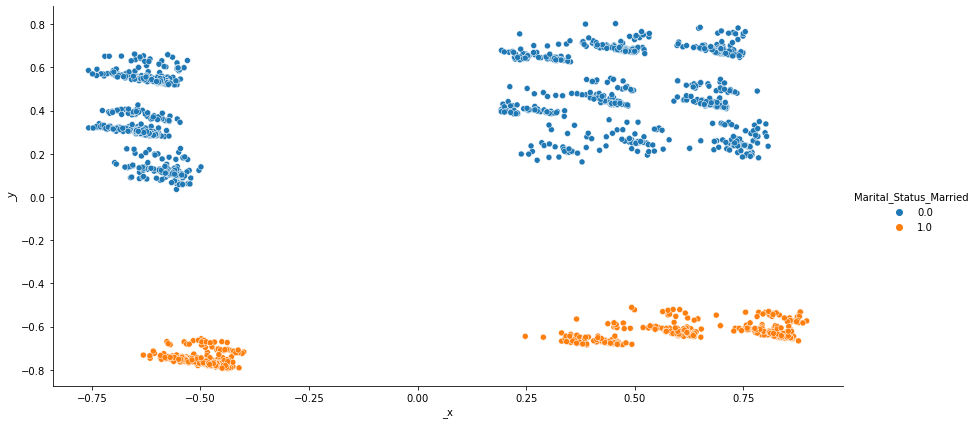

In [115]:
seaborn.relplot(data=new_data ,x=X_pca[:,0], y=X_pca[:, 1], height=6, aspect=2, hue="Marital_Status_Married")

The hue here can give us an insight into how PCA has clustered the data. 

This looks like 15-17 clusters

In [116]:
sum(pca.explained_variance_ratio_[0:2])

0.2743592750433076

This is the sum of the varaince in the first two principal components



**Silhouette scores** 

Let's compare the silhouette scores of KMeans on the post-PCA data with different values of n_clusters.


In [117]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for k in range(2, 35):
    model = KMeans(n_clusters=k)
    model.fit(X_pca)
    score = silhouette_score(X_pca, model.labels_)
    print(k, score)


2 0.14682407071397227
3 0.18047187924347718
4 0.14757943385498146
5 0.18136150987341482
6 0.18784426375687277
7 0.19449826442521867
8 0.2013612849453694
9 0.22403632948621
10 0.22573289179456507
11 0.23664973835266445
12 0.20493993743042138
13 0.21102974280298228
14 0.2214716694204806
15 0.20598199055641128
16 0.27473070777524317
17 0.2048690511492184
18 0.21921150719263466
19 0.22412196502186782
20 0.25111684689072195
21 0.23408484838809765
22 0.21746262416559228
23 0.23894288926824417
24 0.23733461484888724
25 0.20493353305657727
26 0.2235904691368341
27 0.21449338296937287
28 0.20453913912960653
29 0.22684631767093835
30 0.20817659248030818
31 0.2101971712278901
32 0.2173937044962529
33 0.20160779148275876
34 0.21004219803149402


16 clusters has the highest silhouette score, so let's try kmeans with number of clusters as 16

---

**Using KMeans to cluster data**


In [118]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=16)
model.fit(pca_data1)

KMeans(n_clusters=16)

In [119]:
new_data['k16'] = model.labels_

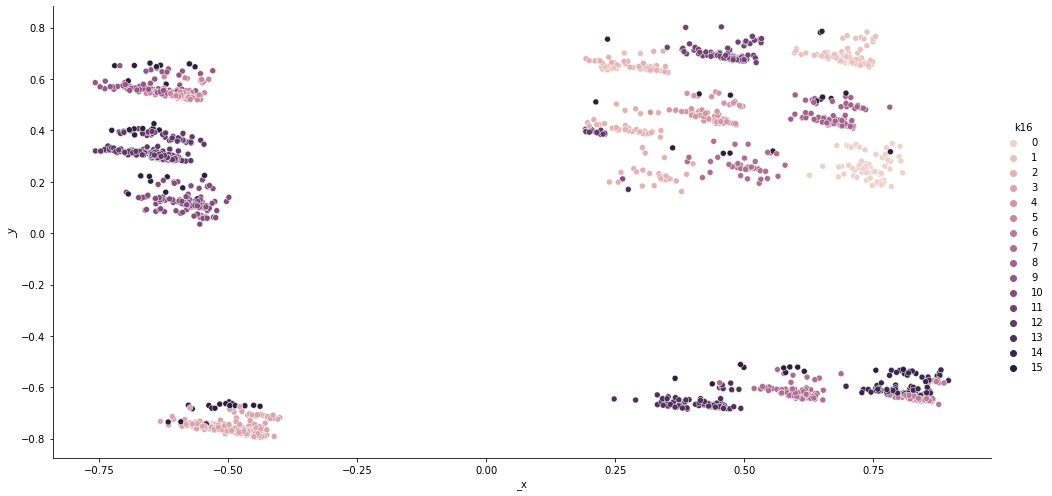

In [121]:
seaborn.relplot(data=new_data, x=X_pca[:, 0],y=X_pca[:,1], aspect=2, height=7,legend="full", hue='k16')

Clusters are pretty good, but not perfect. Let's evaluate the attributes in each for some of the clusters

---
**Cluster with lowest principal component values**  


Let's identify (get the data, via "index") of the cluster that has lowest values on the first two principal components.

What are the unique characteristics, in terms of the original features, of data in this cluster compared to those in the other clusters?

In [123]:
pca_data = pandas.DataFrame(X_pca, index=X.index)

In [125]:
pca_data.var().sort_values()

38    4.102098e-34
37    1.703417e-33
36    7.023962e-33
35    6.135994e-32
34    6.293066e-04
33    8.809183e-04
32    1.062551e-03
31    1.773694e-03
30    2.861348e-03
29    4.178434e-03
28    4.961275e-03
27    8.966843e-03
26    9.824291e-03
25    1.001826e-02
24    1.119574e-02
23    1.139961e-02
22    1.217089e-02
21    1.468695e-02
20    1.659737e-02
19    1.824079e-02
18    2.577566e-02
17    2.817395e-02
16    3.762887e-02
15    3.864521e-02
14    4.076666e-02
13    4.444271e-02
12    4.979954e-02
11    6.936932e-02
10    8.092238e-02
9     8.632173e-02
8     9.567370e-02
7     1.126392e-01
6     1.268581e-01
5     1.392064e-01
4     1.862536e-01
3     2.325331e-01
2     2.562143e-01
1     3.265777e-01
0     3.466812e-01
dtype: float64

In [126]:
pca_data['k16'] = model.labels_

In [136]:
pca_data.groupby('k16').mean()[[0]]

,0
k16,
0,0.738843
1,0.650075
2,0.294661
3,-0.484869
4,0.437844
5,-0.592418
6,0.838446
7,0.574395
8,0.675149


So the cluster with the lowest value for the first principal component is cluster 9, and the cluster with the highest value for the first principal component is 6

Let's look at the first component

In [137]:
pca_data.groupby('k16').mean()[[1]]

,1
k16,
0,0.259534
1,0.681439
2,0.482788
3,-0.762473
4,0.464520
5,0.540920
6,-0.637765
7,-0.387697
8,0.452645


So the cluster with the lowest value for the first principal component is cluster 3, and the cluster with the highest value is cluster 11

Let's look at the size for each of these clusters to see which two we can take a closer look at

In [143]:
cluster_3= (new_data['k16']==3)

In [148]:
len(new_data[cluster_3])

406

In [152]:
cluster_9= new_data['k16']==9

In [153]:
len(new_data[cluster_9])

114

cluster 3 has more data points than cluster 9, so let's analyze cluster 2

In [155]:
new_data[cluster_3].mean()

Year_Birth                 0.750323
Income                     0.071406
Kidhome                    0.238916
Teenhome                   0.263547
Dt_Customer                0.486025
Recency                    0.497437
MntWines                   0.161493
MntFruits                  0.136384
MntMeatProducts            0.089472
MntFishProducts            0.143257
MntSweetProducts           0.113235
MntGoldProds               0.148635
NumDealsPurchases          0.161248
NumWebPurchases            0.149881
NumCatalogPurchases        0.085063
NumStorePurchases          0.441266
NumWebVisitsMonth          0.274754
AcceptedCmp3               0.059113
AcceptedCmp4               0.054187
AcceptedCmp5               0.032020
AcceptedCmp1               0.029557
AcceptedCmp2               0.002463
Complain                   0.014778
Z_CostContact              0.000000
Z_Revenue                  0.000000
Response                   0.064039
Education_2n Cycle         0.000000
Education_Basic            0

In [156]:
new_data[cluster_3].describe()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,k16
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,...,406.0,406.0,406.0,406.0,406.0,406.0,406.0,406.0,406.0,406.0
mean,0.750323,0.071406,0.238916,0.263547,0.486025,0.497437,0.161493,0.136384,0.089472,0.143257,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
std,0.107458,0.030178,0.273636,0.275773,0.289824,0.298146,0.179263,0.203269,0.122266,0.207324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.495146,0.001078,0.000000,0.000000,0.002861,0.000000,0.000000,0.000000,0.000580,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
25%,0.662621,0.047086,0.000000,0.000000,0.234621,0.242424,0.014735,0.010050,0.009275,0.011583,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
50%,0.766990,0.071232,0.000000,0.250000,0.477110,0.494949,0.103148,0.040201,0.036522,0.050193,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
75%,0.825243,0.096357,0.500000,0.500000,0.739628,0.747475,0.259210,0.169598,0.125652,0.189189,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
max,0.961165,0.137869,1.000000,1.000000,0.997139,1.000000,0.970529,0.969849,1.000000,0.980695,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0


In [157]:
cluster_3=new_data[cluster_3]

In [176]:
cluster_3["Marital_Status_Married"].describe()

count    406.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Marital_Status_Married, dtype: float64

In [177]:
cluster_3["Education_Graduation"].describe()

count    406.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Education_Graduation, dtype: float64

This cluster is defined by people who are in the Marital_Status_Married and category and the Education_Graduation categroy. Everyone in this cluster is married and has a bachelor's degree. This might mean that PCA tended to cluster our data towards variables that places our data into predetermined categories

Let's look at clusters with high values for the first two components

In [162]:
cluster_11=new_data['k16']==11

In [163]:
new_data[cluster_11].describe()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,k16
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,...,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0
mean,0.702361,0.075765,0.205882,0.284314,0.503675,0.503268,0.203236,0.118682,0.085416,0.115376,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0
std,0.108211,0.031976,0.247292,0.258612,0.287796,0.291609,0.224791,0.187517,0.106942,0.179853,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.504854,0.019447,0.000000,0.000000,0.002861,0.000000,0.001340,0.000000,0.001159,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0
25%,0.611650,0.055910,0.000000,0.000000,0.260372,0.272727,0.025117,0.005025,0.010580,0.007722,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0
50%,0.699029,0.072196,0.000000,0.500000,0.479971,0.505051,0.114200,0.032663,0.038841,0.040541,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0
75%,0.796117,0.095767,0.500000,0.500000,0.729971,0.772727,0.309946,0.140704,0.122609,0.138996,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0
max,0.961165,0.234614,0.500000,1.000000,0.994278,0.989899,0.831212,0.844221,0.439420,0.849421,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0


In [166]:
len(new_data[cluster_11])

102

In [164]:
cluster_6=new_data['k16']==6

In [167]:
len(new_data[cluster_6])

101

In [169]:
cluster_6=new_data[cluster_6]

The clusters have the same length. Cluster 6 has higher value for component 0 than cluster 11 does for component 1, so let's look at cluster 6

In [172]:
cluster_6.mean()

Year_Birth                 0.717293
Income                     0.067358
Kidhome                    0.351485
Teenhome                   0.297030
Dt_Customer                0.567643
Recency                    0.473947
MntWines                   0.085952
MntFruits                  0.027713
MntMeatProducts            0.031815
MntFishProducts            0.024389
MntSweetProducts           0.021578
MntGoldProds               0.043768
NumDealsPurchases          0.174917
NumWebPurchases            0.110011
NumCatalogPurchases        0.043847
NumStorePurchases          0.319878
NumWebVisitsMonth          0.296535
AcceptedCmp3               0.049505
AcceptedCmp4               0.009901
AcceptedCmp5               0.000000
AcceptedCmp1               0.000000
AcceptedCmp2               0.000000
Complain                   0.000000
Z_CostContact              0.000000
Z_Revenue                  0.000000
Response                   0.079208
Education_2n Cycle         0.000000
Education_Basic            0

In [173]:
cluster_6['Education_PhD'].describe()

count    101.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Education_PhD, dtype: float64

In [175]:
cluster_6['Marital_Status_Married'].describe()

count    101.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Marital_Status_Married, dtype: float64

 cluster 6 is defined by people whose marital status is together, and who also have a PhD.

So these two clusters are categorized by similar features in Education status and Marital Status for consumers